In [32]:
%load_ext autoreload
%autoreload 2

In [37]:

from main import run_experiment
import model
import util 
import pandas as pd
import tensorflow as tf
import pandas as pd 
import os
import shutil


#exp 1 vgg_net r, resnet with regularizer
batch_sizes = [128, 256]
learning_rates = [0.001, 0.01]
model.L2_REG = tf.keras.regularizers.L2(0.0001)


# For vggnets 
all_results = []
train_set, val_set = util.get_train_val_set()
for pf,fn in [("vgg_l",model.vggnet_l), ("vgg_s",model.vggnet_s),("res", model.resnet_model)]:
    results = run_experiment(fn,train_set,val_set,learning_rates=learning_rates,batch_sizes=batch_sizes,result_dir=f"./tmp/results_{pf}", patience=15)
    all_results.append(results)
    
all_results_df = pd.concat(all_results, ignore_index=False, sort=False)
all_results_df.to_csv("./tmp/all_results_exp1.csv",index=False)
    
model.L2_REG = None
all_results = []
train_set, val_set = util.get_train_val_set()
for pf,fn in [("vgg_l",model.vggnet_l), ("vgg_s",model.vggnet_s),("res", model.resnet_model)]:
    results = main.run_experiment(fn,train_set,val_set,learning_rates=learning_rates,batch_sizes=batch_sizes,result_dir=f"./tmp/results_{pf}", patience=15)
    all_results.append(results)

all_results_df = pd.concat(all_results, ignore_index=False, sort=False)
all_results_df.to_csv("./tmp/all_results_exp2.csv",index=False)

results_1 = pd.read_csv("./tmp/all_results_exp1.csv")
results_2 = pd.read_csv("./tmp/all_results_exp2.csv")



L2 Reg <keras.regularizers.L2 object at 0x14f293a85190>


2024-10-23 12:53:58.317093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
121/352 [=========>....................] - ETA: 9s - loss: 4.7831

KeyboardInterrupt: 

In [ ]:
#Evaluation
import pandas as pd 
import os
import shutil
import tensorflow as tf
import util
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

results_1 = pd.read_csv("./all_results_exp1.csv")
results_2 = pd.read_csv("./all_results_exp2.csv")


#Evaluation on unseen dataset
all_results = pd.concat([results_1,results_2], ignore_index=True, sort=False)
best_result = all_results[all_results['val_acc']==all_results['val_acc'].max()]
print("Best result")
print(best_result)
best_model_path = best_result['folder'].item() + "/best.hd5"
print(best_model_path)
best_model = tf.keras.models.load_model(best_model_path)



test_set = util.get_test_set()
test_ds = test_set.map(util.preprocess_data).batch(32)
predictions = best_model.predict(test_ds).argmax(-1)
truths = np.concatenate([tf.argmax(labels,axis=-1) for _,labels in test_ds],axis=0)

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(
   truths, predictions)
plt.savefig("./figures/confusion_matrix.jpg")
plt.close()  


print("Best model evaluation")
acc,f1,_ = util.evaluate_on_test(best_model,top_k=5)
print("Top-5 accuracy for the best model", acc)


In [8]:
import pandas as pd 
import os
import shutil
import tensorflow as tf
import util
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
results_1 = pd.read_csv("./tmp/all_results_exp1.csv")
results_2 = pd.read_csv("./tmp/all_results_exp2.csv")

#make figures folder
print("Saving to figures folder")
os.makedirs("./tmp/figures",exist_ok=True)
for results in [results_1,results_2]:
    for id,result in results.iterrows():
        folder = result['folder']
        model = folder.split("/")[2].split("_")[1:]
        model_str = "_".join(model)
        history_file = os.path.join(result['folder'],"training_history.jpg")
        new_file = f"{model_str}_{result['learning_rate']:.0e}_{result['batch_size']}_th.jpg"
        destination_file = os.path.join("./tmp/figures",new_file)
        shutil.copyfile(history_file, destination_file)
        print(destination_file)


Saving to figures folder
./tmp/figures/vgg_lr_1e-03_128_th.jpg
./tmp/figures/vgg_lr_1e-02_128_th.jpg
./tmp/figures/vgg_lr_1e-03_256_th.jpg
./tmp/figures/vgg_lr_1e-02_256_th.jpg
./tmp/figures/vgg_sr_1e-03_128_th.jpg
./tmp/figures/vgg_sr_1e-02_128_th.jpg
./tmp/figures/vgg_sr_1e-03_256_th.jpg
./tmp/figures/vgg_sr_1e-02_256_th.jpg
./tmp/figures/resr_1e-03_128_th.jpg
./tmp/figures/resr_1e-02_128_th.jpg
./tmp/figures/resr_1e-03_256_th.jpg
./tmp/figures/resr_1e-02_256_th.jpg
./tmp/figures/vgg_l_1e-03_128_th.jpg
./tmp/figures/vgg_l_1e-02_128_th.jpg
./tmp/figures/vgg_l_1e-03_256_th.jpg
./tmp/figures/vgg_l_1e-02_256_th.jpg
./tmp/figures/vgg_s_1e-03_128_th.jpg
./tmp/figures/vgg_s_1e-02_128_th.jpg
./tmp/figures/vgg_s_1e-03_256_th.jpg
./tmp/figures/vgg_s_1e-02_256_th.jpg
./tmp/figures/res_1e-03_128_th.jpg
./tmp/figures/res_1e-02_128_th.jpg
./tmp/figures/res_1e-03_256_th.jpg
./tmp/figures/res_1e-02_256_th.jpg


In [1]:
import pandas as pd 
import os
import shutil
import tensorflow as tf
import util
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

results_1 = pd.read_csv("./all_results_exp1.csv")
results_2 = pd.read_csv("./all_results_exp2.csv")

all_results = pd.concat([results_1,results_2], ignore_index=True, sort=False)
best_result = all_results[all_results['val_acc']==all_results['val_acc'].max()]
print("Best result")
print(best_result)
best_model_path = best_result['folder'].item() + "/best.hd5"
print(best_model_path)
best_model = tf.keras.models.load_model(best_model_path)


test_set = util.get_test_set()
test_ds = test_set.map(util.preprocess_data).batch(32)
predictions = best_model.predict(test_ds).argmax(-1)
truths = np.concatenate([tf.argmax(labels,axis=-1) for _,labels in test_ds],axis=0)

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(
   truths, predictions,normalize="true")
# plt.savefig("./tmp/figures/confusion_matrix.jpg")
plt.show()
plt.close()  


print("Best model evaluation")
acc,f1,_ = util.evaluate_on_test(best_model,top_k=5)
print("Top-5 accuracy for the best model", acc)


Best result
     val_acc    val_f1                         folder  batch_size  \
10  0.783778  0.448362  ./results_resr/20241022164025         256   

    learning_rate  
10          0.001  
./results_resr/20241022164025/best.hd5


2024-10-23 23:14:23.353633: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-23 23:14:29.962182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d8:00.0, compute capability: 7.0
2024-10-23 23:14:32.273038: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-10-23 23:14:37.354429: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8902
2024-10-23 23:14:38.603044: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child proc

KeyboardInterrupt: 

In [4]:
import util
train_set, val_set = util.get_train_val_set()
print(len(train_set), len(val_set))

test_set = util.get_test_set()
len(test_set)

45000 4500


10000

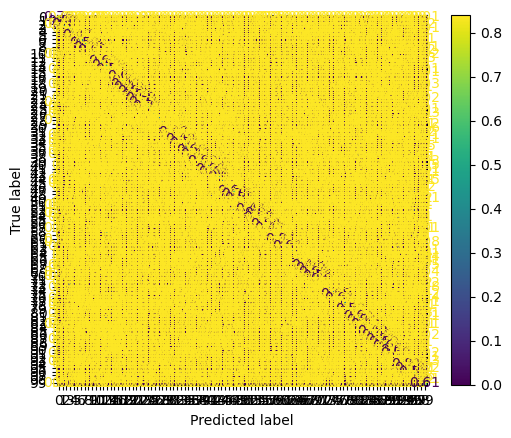

Best model evaluation
Top-5 accuracy for the best model 0.7807


In [5]:


test_set = util.get_test_set()
test_ds = test_set.map(util.preprocess_data).batch(32)
predictions = best_model.predict(test_ds).argmax(-1)
truths = np.concatenate([tf.argmax(labels,axis=-1) for _,labels in test_ds],axis=0)

#Confusion matrix
ConfusionMatrixDisplay.from_predictions(
   truths, predictions,normalize="true")
# plt.savefig("./tmp/figures/confusion_matrix.jpg")
plt.show()
plt.close()  


print("Best model evaluation")
acc,f1,_ = util.evaluate_on_test(best_model,top_k=5)
print("Top-5 accuracy for the best model", acc)


In [7]:
f1


0.46389532968618064